# Arindam Ghosh

# Decision-Tree

In [26]:
#importing all the essential libraries
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop('Id',1,inplace=True) ###We don't need this column

In [4]:
#Checking the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#checking the shape
df.shape

(150, 5)

In [6]:
#Chceking the null values
df.isnull().sum() 

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Let's check the correlation of all the features

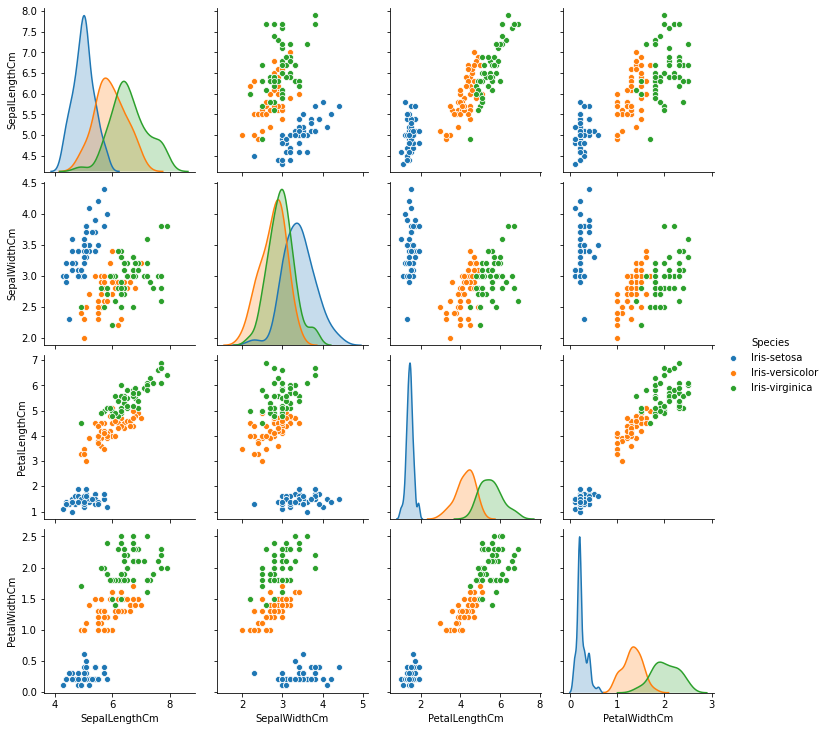

In [7]:
sns.pairplot(data=df,hue ='Species')
plt.show()

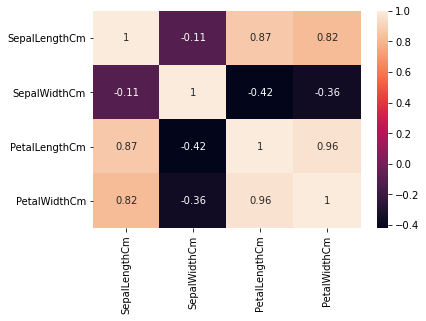

In [8]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# From the above two plots it is very much clear that PetalLength  and PetalWidth are highly correlated and species 'Iris-Setosa'  always form a different cluster . 

# Now we will separate the target(y) and features(x) from the dataset.

In [9]:
y = df['Species']
X = df.drop('Species',1)

In [11]:
# Since , the target variable is object ,so we need to use labelencoder . 
le = LabelEncoder() #instantiate
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

So,we get 'Iris-setosa' as 0,'Iris-Versicolor' as 1 and 'Iris-Virginica' as 2

In [13]:
#Train-Test split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=3)

In [14]:
X_train.shape

(105, 4)

In [15]:
X_test.shape

(45, 4)

In [16]:
y_train.shape

(105,)

In [17]:
y_test.shape

(45,)

# Modelling tree and testing it

In [19]:
dtree=DecisionTreeClassifier() #instantiate
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
# predicting the values of test data
y_pred = dtree.predict(X_test)

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      0.93      0.93        14
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



Text(0.5, 24.0, 'Predicted label')

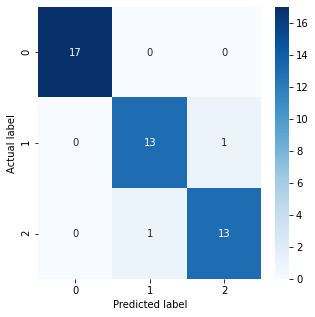

In [25]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,annot=True,cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

[Text(334.8, 398.64, 'PetalWidthCm <= 0.8\ngini = 0.666\nsamples = 105\nvalue = [33, 36, 36]\nclass = versicolor'),
 Text(251.10000000000002, 326.15999999999997, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]\nclass = setosa'),
 Text(418.5, 326.15999999999997, 'PetalWidthCm <= 1.65\ngini = 0.5\nsamples = 72\nvalue = [0, 36, 36]\nclass = versicolor'),
 Text(167.4, 253.67999999999998, 'PetalLengthCm <= 4.95\ngini = 0.145\nsamples = 38\nvalue = [0, 35, 3]\nclass = versicolor'),
 Text(83.7, 181.2, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = versicolor'),
 Text(251.10000000000002, 181.2, 'SepalWidthCm <= 2.75\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = verginica'),
 Text(167.4, 108.71999999999997, 'SepalWidthCm <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(83.7, 36.23999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = verginica'),
 Text(251.10000000000002, 36.23999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nc

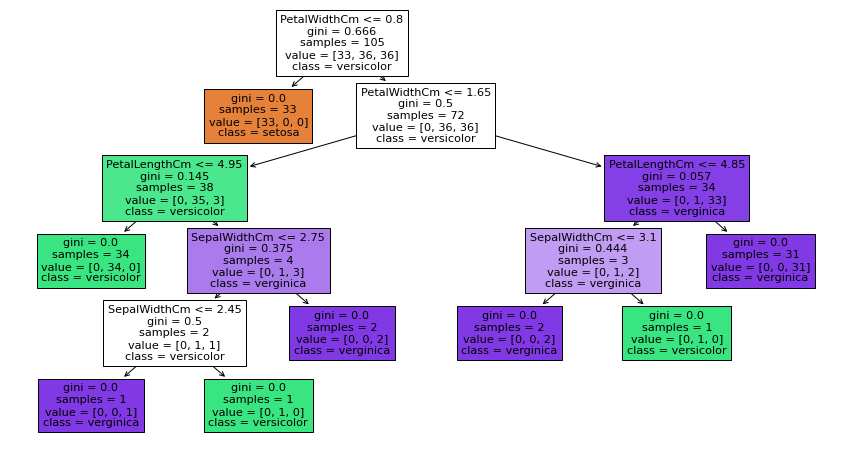

In [32]:
plt.figure(figsize=(15,8))
plot_tree(decision_tree = dtree,feature_names = X_train.columns,filled=True,class_names =["setosa", "versicolor", "verginica"])